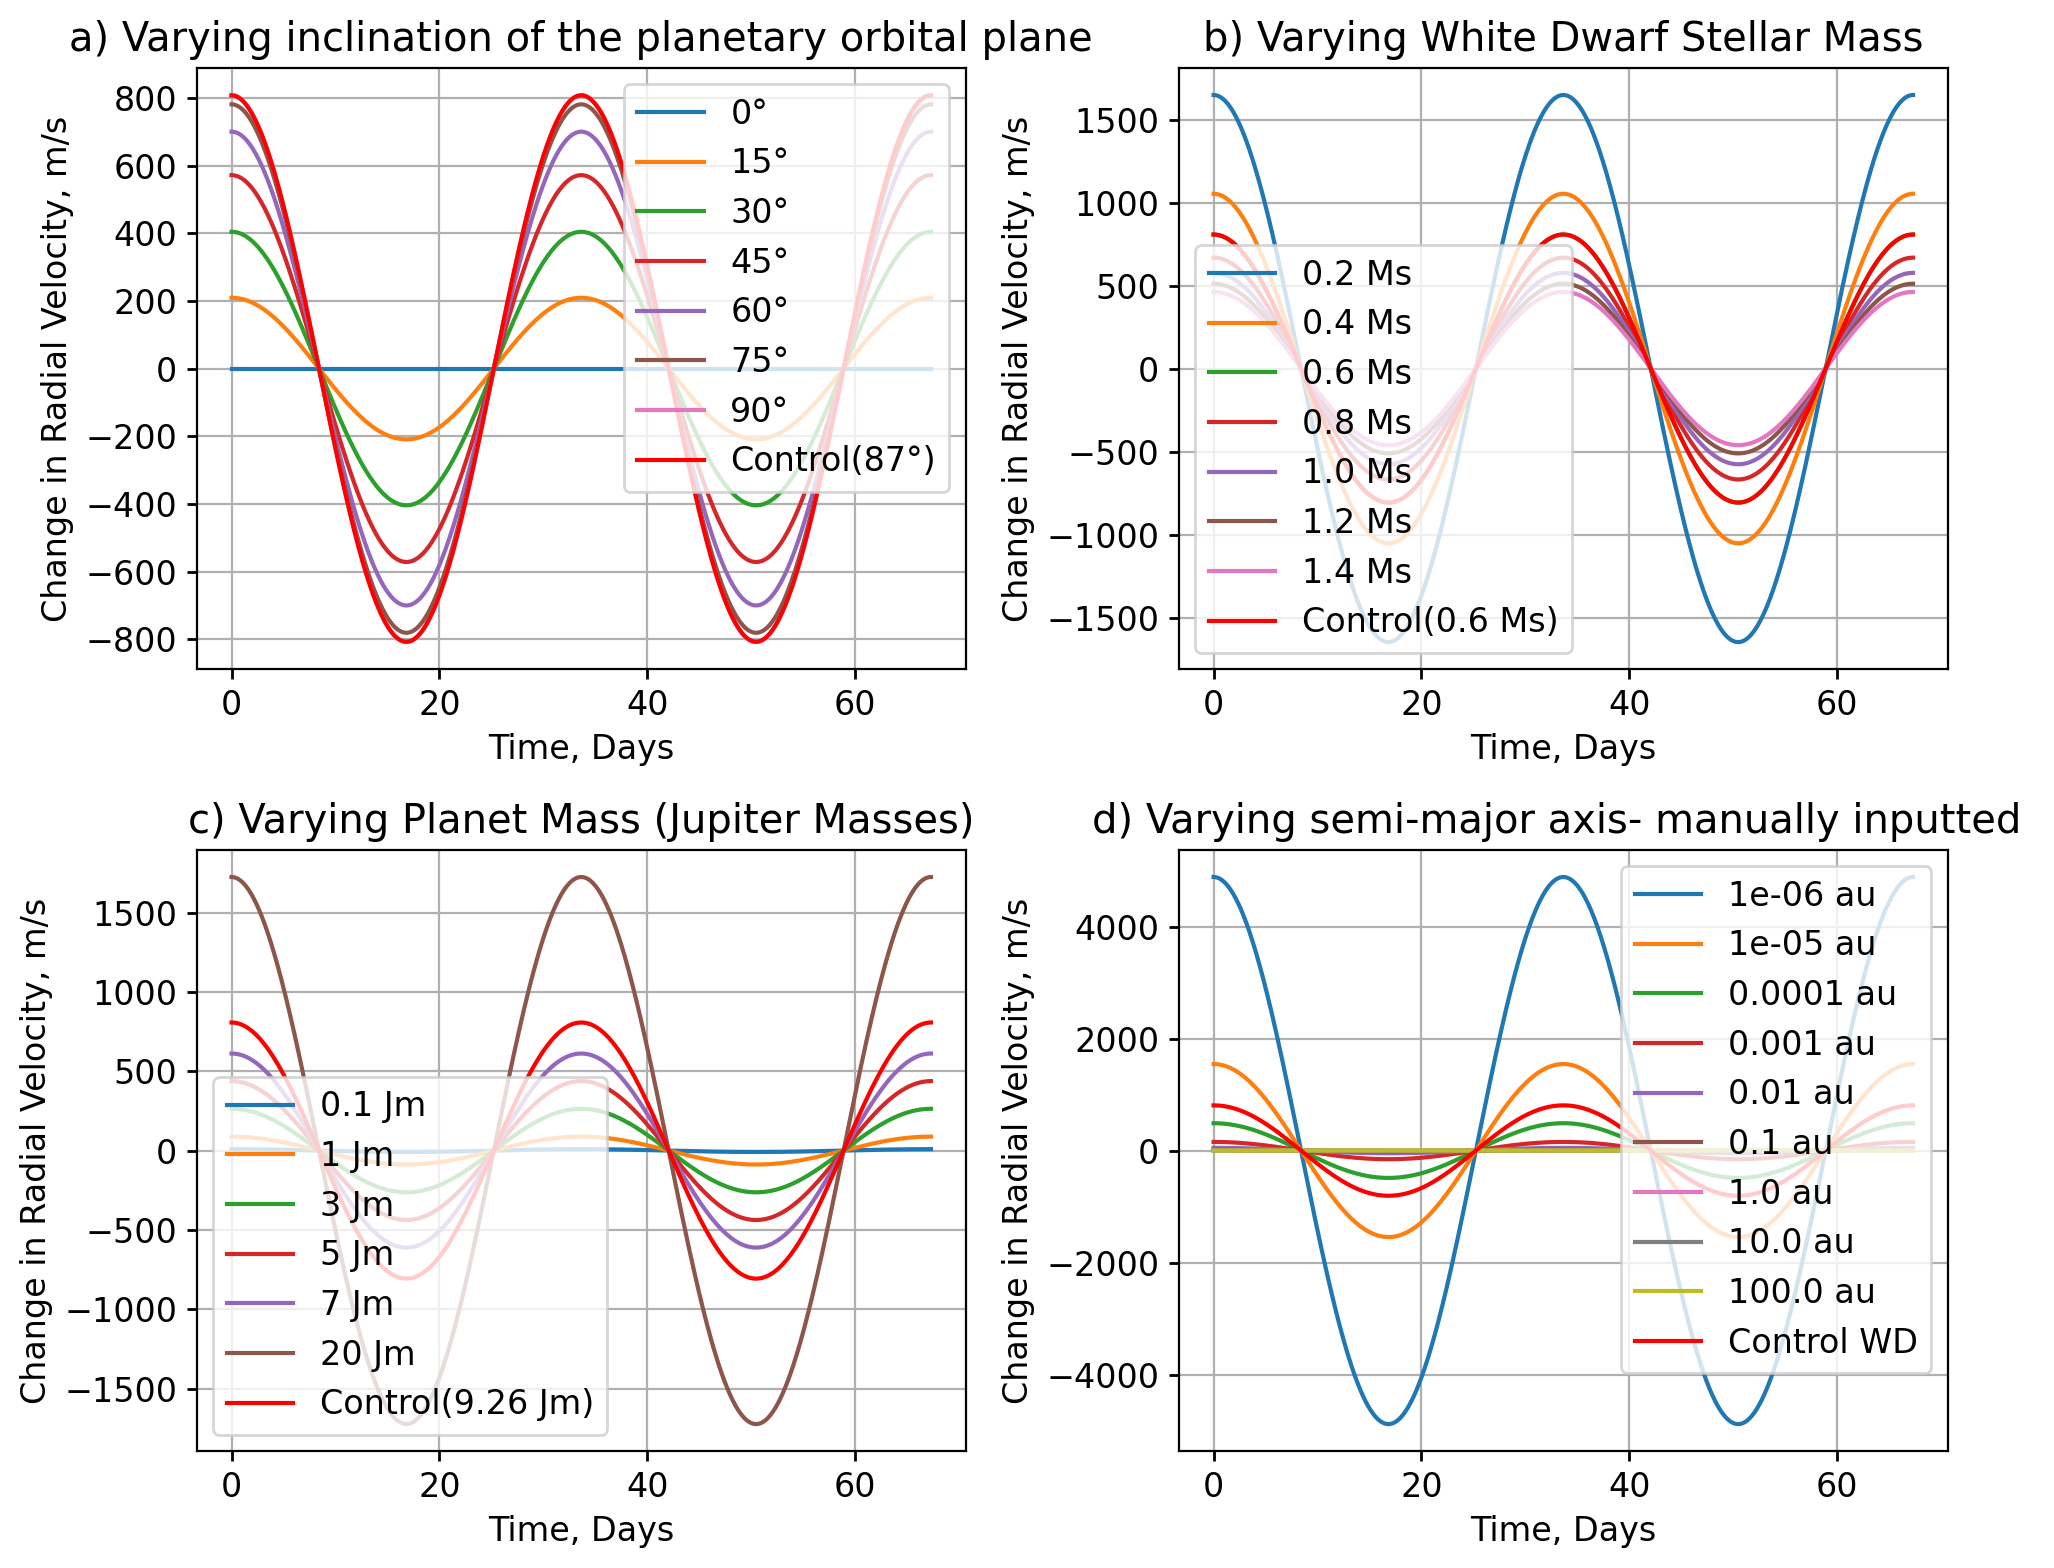

In [1]:
#Initial attempt at simulating radial velosity curves for exoplanet detection 
#Using the equations and theory from the planetary system dynamics example sheet 

# Ideally store a dictionary for each white dwarf
#Then reference each value in the dictionary so the formula is interchangeable

import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction


default_settings = {
    'font.size': 12,
    'axes.linewidth': 0.8,
    'xtick.major.size': 3.5,
    'xtick.major.width': 1,
    'ytick.major.size': 3.5,
    'ytick.major.width': 1
}


initial_settings = {
    'font.size': 22,
    'axes.linewidth': 1.25,
    'xtick.major.size': 5,
    'xtick.major.width': 1.25,
    'ytick.major.size': 5,
    'ytick.major.width': 1.25
}
plt.rcParams.update(default_settings)

# Constants
G = 6.67430e-11         # Gravitational constant (m^3/kg/s^2)
Mwd = 0.6* 2e30    # Mass of the star (in kilograms)
Mpl = 9.26 * 1.898e27         # Mass of the planet (in kilograms)
au = 149597870700
#asun = 2*au
a = 0 #placeholder for a

period = 33.65 * 24 *3600    # Orbital period of the planet (in seconds)

e = 0                # Eccentricity of the planet's orbit
i =  87              #inclination of the orbital plane to the true sky
omega = 0    #argument of pericenter chosen at 0 - leads to no eccentricities

# Time range
t = np.linspace(0, 2* period, 1000)
tdays = t/(24*3600) 

# Calculate the radial velocity variation - using newton raphson iteration
def eccentric_anomaly(mean_anomaly):
    # Initial guess for eccentric anomaly, as a function of mean anomaly
    E0 = mean_anomaly
    while True:
        E1 = E0 - (E0 - e * np.sin(E0) - mean_anomaly) / (1 - e * np.cos(E0))
        if abs(E1 - E0) < 1e-8:
            break
        E0 = E1
    return E1

def radial_velocity(t,Mwd,M_pl, T, e, i,a,): 
    #input parameters of time, Mass of WD,mass of planet in jupiter masses, Orbital period, eccentricity, inclination, set semi major axis of planet.
    period = T * 24 *3600 #convert into seconds
    Mpl = M_pl  * 1.898e27 #convert into kg
    i = i *np.pi/180  #convert into radians
    if a == 0:
        a = np.cbrt(period**2 * G * (Mpl +Mwd)/(4*np.pi**2)) 
        asun = a * (Mpl/(Mwd+Mpl))
    else: #a has been inputted as a function of 
        asun = a* au * (Mwd/Mpl)

    Mprime = (Mpl**3/((Mwd + Mpl)**2))
    P = np.sqrt(((4 * np.pi**2)/ (G * Mprime))* asun**3)

    # Calculate the mean anomaly
    mean_anomaly = 2 * np.pi * t / period

    # Calculate the eccentric anomaly
    eccentric_anomaly_values = [eccentric_anomaly(ma) for ma in mean_anomaly]

    # Calculate the true anomaly
    mu = [2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(ea / 2)) for ea in eccentric_anomaly_values]

    K = 2 * (np.pi/P) * (asun * np.sin(i))/(((1 - e**2)**(1/2)))

    vrad = K*(np.cos(mu)  + e * np.cos(omega))#the velocity of the star along the line of sight
    #should add in omega^^ here
    return vrad 


def radial_velocity_a(t,Mwd,M_pl, e, i,a,): 
    #input parameters of time, Mass of WD,mass of planet in jupiter masses, Orbital period, eccentricity, inclination, set semi major axis of planet.
    period = T * 24 *3600 #convert into seconds
    Mpl = M_pl  * 1.898e27 #convert into kg
    i = i *np.pi/180  #convert into radians
    if a == 0:
        a = np.cbrt(period**2 * G * (Mpl +Mwd)/(4*np.pi**2)) 
        asun = a * (Mpl/(Mwd+Mpl))
    else: #a has been inputted as a function of 
        asun = a* au * (Mwd/Mpl)

    Mprime = (Mpl**3/((Mwd + Mpl)**2))
    P = np.sqrt(((4 * np.pi**2)/ (G * Mprime))* asun**3)

    # Calculate the mean anomaly
    mean_anomaly = 2 * np.pi * t / period

    # Calculate the eccentric anomaly
    eccentric_anomaly_values = [eccentric_anomaly(ma) for ma in mean_anomaly]

    # Calculate the true anomaly
    mu = [2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(ea / 2)) for ea in eccentric_anomaly_values]

    K = 2 * (np.pi/P) * (asun * np.sin(i))/(((1 - e**2)**(1/2)))

    vrad = K*(np.cos(mu)  + e * np.cos(omega))#the velocity of the star along the line of sight
    #should add in omega^^ here
    return vrad 

radial_velocities_original = radial_velocity(t,0.6* 2e30,9.26, 33.65, 0, 87,a)

# Plot the radial velocity variations
fig, axs = plt.subplots(2, 2, figsize=(10, 8),dpi = 200)
#plt.figure()
#plt.plot(tdays, radial_velocities,  marker='o', linestyle='-')
#plt.title("Radial Velocity of a Star with an Orbiting Exoplanet")
#plt.xlabel("Time (days)")
#plt.ylabel("Radial Velocity (m/s)")
#fill in data for each subplot

#Inclination


for i in (0, 15 ,30 , 45, 60, 75 , 90):
    axs[0, 0].plot(tdays,radial_velocity(t,0.6* 2e30,9.26, 33.65, 0, i,a) , label=(str(i) +"°"))
axs[0, 0].plot(tdays, radial_velocity(t,0.6* 2e30,9.26, 33.65, 0, 87,a), label='Control(87°)', color='red')
axs[0, 0].set_title('a) Varying inclination of the planetary orbital plane')
axs[0, 0].set_xlabel('Time, Days')
axs[0, 0].set_ylabel('Change in Radial Velocity, m/s')


for Mwd in np.linspace(0.2,1.4,7):
    axs[0, 1].plot(tdays, radial_velocity(t,Mwd * 2e30,9.26, 33.65, 0, 87,a), label= str(Mwd) + " Ms" )
axs[0, 1].plot(tdays, radial_velocity(t,0.6* 2e30,9.26, 33.65, 0, 87,a), label='Control(0.6 Ms)', color='red')
axs[0, 1].set_title('b) Varying White Dwarf Stellar Mass')
axs[0, 1].set_xlabel('Time, Days')
axs[0, 1].set_ylabel('Change in Radial Velocity, m/s')


for Mpl in (0.1,1,3,5,7,20):
    axs[1, 0].plot(tdays, radial_velocity(t,0.6* 2e30,Mpl, 33.65, 0, 87,a), label=str(Mpl) + " Jm")
axs[1, 0].plot(tdays, radial_velocity(t, 0.6* 2e30,9.26, 33.65, 0, 87,a), label='Control(9.26 Jm)', color='red')
axs[1, 0].set_title('c) Varying Planet Mass (Jupiter Masses)')
axs[1, 0].set_xlabel('Time, Days')
axs[1, 0].set_ylabel('Change in Radial Velocity, m/s')


for a in np.logspace(np.log10(1E-6),np.log10(1E2),9):
    axs[1, 1].plot(tdays, radial_velocity(t,0.6* 2e30,9.26, 33.65, 0, 87,a), label=str(a)+ " au")
axs[1, 1].plot(tdays, radial_velocity(t, 0.6* 2e30,9.26, 33.65, 0, 87,0), label='Control WD', color='red')
axs[1, 1].set_title('d) Varying semi-major axis- manually inputted ')
axs[1, 1].set_xlabel('Time, Days')
axs[1, 1].set_ylabel('Change in Radial Velocity, m/s')
axs[1, 1].grid()

for ax in axs.flat:
    ax.legend()
    ax.grid()
plt.tight_layout()
plt.grid()

#plt.savefig("/Users/macintosh/Desktop/Cambridge/Course/Research_Project/Coding/graphs/RadVel.png")
plt.show()
